# Student Performance 
- Author: Max Kuan
- Date: 2022.02.26
- Source: https://archive.ics.uci.edu/ml/datasets/student+performance
- Citation: P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("student-por.csv", delimiter=';')

## Attribute Descriptions
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

In [10]:
condition = {"Medu":{0:"none", 1:"primary", 2:"5-9th grade", 3:"secondary", 4:"higher"}, 
             "Fedu":{0:"none", 1:"primary", 2:"5-9th grade", 3:"secondary", 4:"higher"},
            "traveltime":{1:"<15 min", 2: "15 to 30 min", 3:"30 min to 1 hours", 4:'over a hour'},
            "studytime":{1:"< 2 hours", 2: "2 to 5 hours", 3:"5 to 10 hours", 4:'over ten hours'},
            }
data.replace(condition, inplace=True)

In [11]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,higher,higher,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,primary,primary,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,primary,primary,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,higher,5-9th grade,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,secondary,secondary,other,other,...,4,3,2,1,2,5,0,11,13,13


In [12]:
data.shape

(649, 33)

In [13]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    object
 7   Fedu        649 non-null    object
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    object
 13  studytime   649 non-null    object
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [15]:
def dataSummarize(data):
    """This function summarise the dataset info, including numerical or categorical features
       checking duplicate record and missing values
    """
    
    # Seperate Numerical and Categorical value
    numerical = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical = data.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Check Anomolies, duplicate and missing values
    duplicate_num = data.duplicated().sum()
    duplicate_index = data[data.duplicated(keep=False)].index.tolist()
    
    missing = data.isna().sum()
    
    print(f"""
--------- Summarize --------------
Numerical features: {numerical}
Categorical features: {categorical}

--------- Duplicate --------------
How many duplicate records: {duplicate_num}
Where is the duplicate record occur: {duplicate_index}

--------- Missing ----------------
{missing}

""")
    return (numerical, categorical, duplicate_index)



In [16]:
numeric, category, duplicated = dataSummarize(data)


--------- Summarize --------------
Numerical features: ['age', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

--------- Duplicate --------------
How many duplicate records: 0
Where is the duplicate record occur: []

--------- Missing ----------------
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
hea

In [22]:
data.describe()

,age,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [21]:
data.describe(include=["O"])

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,...,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,5,5,4,...,4,4,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,5-9th grade,5-9th grade,other,other,course,...,<15 min,2 to 5 hours,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,186,209,258,367,285,...,366,305,581,398,610,334,521,580,498,410


<AxesSubplot:>

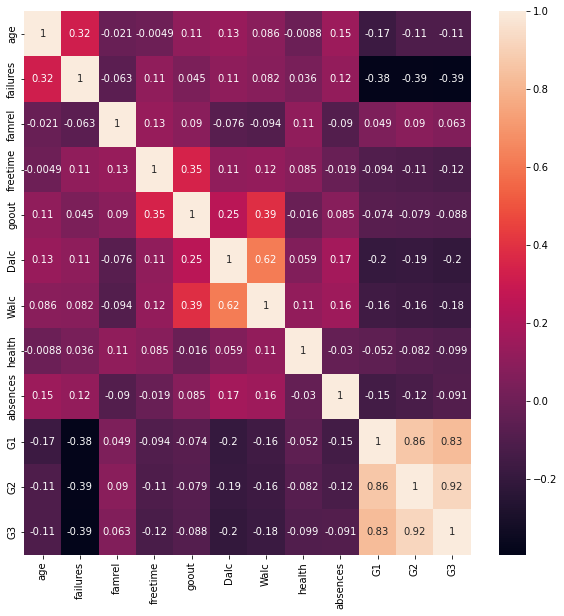

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), annot=True)

<AxesSubplot:xlabel='absences', ylabel='Count'>

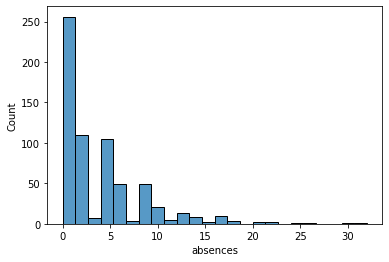

In [34]:
sns.histplot(data=data, x='absences')

<AxesSubplot:xlabel='G1', ylabel='Count'>

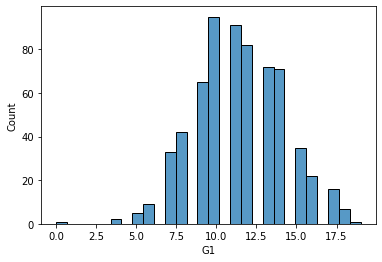

In [35]:
sns.histplot(data=data, x='G1')

<AxesSubplot:xlabel='G2', ylabel='Count'>

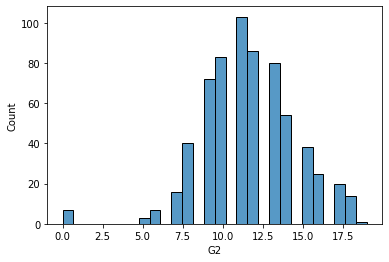

In [36]:
sns.histplot(data=data, x='G2')